# Obtención DFs df_green y df_issa

In [ ]:
import pandas as pd
df=pd.read_csv('/content/rivers.csv')
df=df.drop(columns='Unnamed: 0')
df

,Sample_ID,Collect_DateTime,Depth_(m),Site_Type,Area,Locator,Site,Parameter,Value,Units,SiteName,Latitude,Longitude,New_Georeferenced_Column
0,17625,01/14/1998 12:48:00 PM,NaN,Streams and Rivers,Cedar,A438,Cedar River at SE Jones Rd,Storm Or Non-Storm,NaN,none,Cedar River at SE Jones Rd,47.4579,-122.0783,POINT (-122.0783056 47.45794444)
1,11621,03/15/1984 12:00:00 AM,1.0,Streams and Rivers,Cedar,A438,Cedar River at SE Jones Rd,Conductivity,50.0000,umhos/cm,Cedar River at SE Jones Rd,47.4579,-122.0783,POINT (-122.0783056 47.45794444)
2,8312,03/08/1977 12:00:00 AM,1.0,Streams and Rivers,Cedar,A438,Cedar River at SE Jones Rd,Nitrite + Nitrate Nitrogen,0.5150,mg/L,Cedar River at SE Jones Rd,47.4579,-122.0783,POINT (-122.0783056 47.45794444)
3,13654,09/16/1987 12:00:00 AM,1.0,Streams and Rivers,Cedar,A438,Cedar River at SE Jones Rd,Total Phosphorus,0.0130,mg/L,Cedar River at SE Jones Rd,47.4579,-122.0783,POINT (-122.0783056 47.45794444)
4,34581,01/13/2016 12:25:00 PM,NaN,Streams and Rivers,Cedar,A438,Cedar River at SE Jones Rd,Ammonia Nitrogen,0.0038,mg/L,Cedar River at SE Jones Rd,47.4579,-122.0783,POINT (-122.0783056 47.45794444)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444843,196150,12/18/1973 12:00:00 AM,1.0,Streams and Rivers,Duwamish,0308,Duwamish River/Boeing Bridge/burned bridge at ...,Ammonia Nitrogen,0.1300,mg/L,Duwamish River/Boeing Bridge/burned bridge at ...,47.5123,-122.3000,POINT (-122.3000031 47.5122986)
444844,196165,02/17/1970 12:00:00 AM,1.0,Streams and Rivers,Duwamish,0308,Duwamish River/Boeing Bridge/burned bridge at ...,Fecal Coliform,480.0000,ORG/100ml,Duwamish River/Boeing Bridge/burned bridge at ...,47.5123,-122.3000,POINT (-122.3000031 47.5122986)
444845,196192,09/04/1975 12:00:00 AM,1.0,Streams and Rivers,Duwamish,0308,Duwamish River/Boeing Bridge/burned bridge at ...,Ammonia Nitrogen,1.1700,mg/L,Duwamish River/Boeing Bridge/burned bridge at ...,47.5123,-122.3000,POINT (-122.3000031 47.5122986)
444846,196195,10/27/1971 12:00:00 AM,1.0,Streams and Rivers,Duwamish,0308,Duwamish River/Boeing Bridge/burned bridge at ...,Total Hydrolyzable Phosphorus,0.1600,mg/L,Duwamish River/Boeing Bridge/burned bridge at ...,47.5123,-122.3000,POINT (-122.3000031 47.5122986)


Text(0.5, 0, 'Cantidad de entradas')

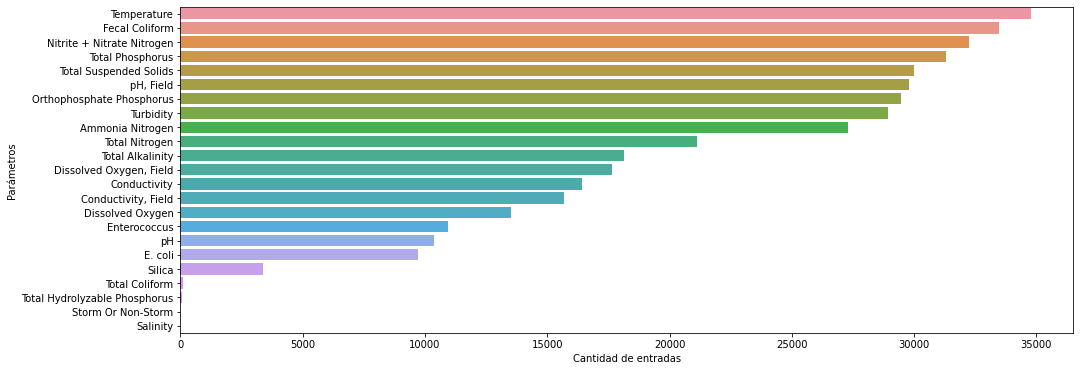

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data=df.groupby('Parameter').Value.count().sort_values(ascending=False)

plt.figure(figsize=(16,6))
sns.barplot(y=data.index, x=data, orient='h')
plt.ylabel("Parámetros")
plt.xlabel("Cantidad de entradas")

In [ ]:
#primero obtenemos los índices de las filas que tienen ese parámetro
index_names = df[df['Parameter'] == 'Storm Or Non-Storm' ].index
index_names=index_names.append(df[df['Parameter'] == 'Salinity' ].index)
index_names=index_names.append(df[df['Parameter'] == 'Total Hydrolyzable Phosphorus' ].index)
#ahora dropeamos del df todas las rows 
df.drop(index_names, inplace = True)
df.groupby('Parameter').Value.count().sort_values(ascending=False)

Parameter
Temperature                   34772
Fecal Coliform                33482
Nitrite + Nitrate Nitrogen    32247
Total Phosphorus              31296
Total Suspended Solids        29998
pH, Field                     29802
Orthophosphate Phosphorus     29453
Turbidity                     28938
Ammonia Nitrogen              27283
Total Nitrogen                21134
Total Alkalinity              18155
Dissolved Oxygen, Field       17647
Conductivity                  16420
Conductivity, Field           15689
Dissolved Oxygen              13504
Enterococcus                  10937
pH                            10350
E. coli                        9709
Silica                         3395
Total Coliform                  115
Name: Value, dtype: int64

In [ ]:
df.Area.unique()

array(['Cedar', 'Green', 'Rock', 'McAleer', 'Springbrook/Black River',
       'Little Soos', 'Jenkins', 'Sammamish', 'Newaukum', 'Mileta',
       'Laughing Jacobs', 'Swamp', 'Snoqualmie', 'Kelsey', 'Bear', 'Coal',
       'Lewis', 'Crisp', 'Pipers', 'Little Bear', 'Evans', 'Covington',
       'Duwamish', 'Idylwood', 'Issaquah', 'Soos', 'May', 'North', 'Judd',
       'Thornton', 'Griffin Creek', 'Cochran Springs',
       'Snoqualmie - North Fork', 'Cottage Lake Creek', 'Longfellow',
       'Pine Lake', 'Skykomish', 'Ebright', 'Venema', 'Fisher', 'Mill',
       'Eden', 'Ames Creek', 'Ravensdale', 'Forbes', 'Lyon',
       'Fairweather', 'Tibbetts', 'Snoqualmie - South Fork', 'Tahlequah',
       'Yarrow', 'Cherry Creek', 'Juanita', 'Shinglemill',
       'Patterson Creek', 'Tolt River', 'Boise', 'Harris Creek',
       'Snoqualmie - Middle Fork', 'Gorsuch', 'Raging River', 'Zackuse',
       'Christensen'], dtype=object)

Text(0.5, 0, 'Cantidad de entradas')

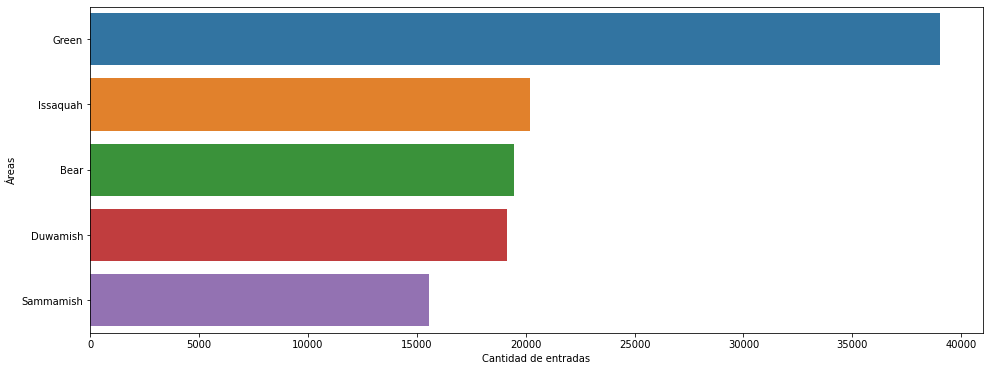

In [ ]:
data=df.Area.value_counts().sort_values(ascending=False).nlargest(5)

plt.figure(figsize=(16,6))
sns.barplot(y=data.index, x=data, orient='h')
plt.ylabel("Áreas")
plt.xlabel("Cantidad de entradas")

In [ ]:
#separamos los dos dataframes
df_green=df.loc[(df['Area']=='Green')]
df_issa=df.loc[(df['Area']=='Issaquah')]

# Obtención del DF df_green_features

In [ ]:
df_green_pivoted=df_green.pivot(index=('Sample_ID','Collect_DateTime'),columns='Parameter', values='Value')
df_green_pivoted

,Parameter,Ammonia Nitrogen,Conductivity,"Conductivity, Field",Dissolved Oxygen,"Dissolved Oxygen, Field",E. coli,Enterococcus,Fecal Coliform,Nitrite + Nitrate Nitrogen,Orthophosphate Phosphorus,Silica,Temperature,Total Alkalinity,Total Nitrogen,Total Phosphorus,Total Suspended Solids,Turbidity,pH,"pH, Field"
Sample_ID,Collect_DateTime,,,,,,,,,,,,,,,,,,,
5721,04/12/2017 10:21:00 AM,0.0100,NaN,58.7,NaN,11.30,NaN,NaN,17.0,0.336,0.00699,NaN,8.2,20.3,0.440,0.0208,4.2,2.90,NaN,7.41
5744,04/12/2017 08:22:00 AM,0.0203,NaN,84.6,NaN,10.60,NaN,NaN,40.0,0.379,0.01280,NaN,9.3,25.8,0.490,0.0292,5.8,5.59,NaN,7.47
5776,04/12/2017 11:35:00 AM,0.0038,NaN,47.4,NaN,12.00,NaN,NaN,1.0,0.236,0.00424,NaN,8.0,16.4,0.301,0.0131,2.6,1.72,NaN,7.65
5779,04/12/2017 08:13:00 AM,0.0283,NaN,84.4,NaN,10.60,NaN,NaN,37.0,0.386,0.01460,NaN,9.2,25.7,0.500,0.0327,5.4,4.08,NaN,7.44
7278,01/22/1970 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193429,09/28/2020 10:43:00 AM,0.0047,NaN,58.7,NaN,10.80,NaN,NaN,18.0,0.211,0.00328,NaN,13.7,22.4,0.319,0.0152,3.3,1.88,NaN,7.80
193944,10/14/2020 09:37:00 AM,0.0164,NaN,91.0,NaN,9.53,NaN,NaN,97.0,0.273,0.02360,NaN,13.2,32.6,0.479,0.0532,5.4,3.70,NaN,7.38
193969,10/14/2020 10:18:00 AM,0.0029,NaN,56.6,NaN,11.20,NaN,NaN,17.0,0.208,0.00160,NaN,12.6,21.4,0.292,NaN,1.7,1.89,NaN,7.74


In [ ]:
#le sacamos los espacios a los nombres de columnas
df_green_pivoted.columns = df_green_pivoted.columns.str.replace(' ', '_')
df_green_pivoted.columns = df_green_pivoted.columns.str.replace('+', '_')
df_green_pivoted.columns = df_green_pivoted.columns.str.replace(',', '_')
df_green_pivoted.columns = df_green_pivoted.columns.str.replace('__', '_')
df_green_pivoted

,Parameter,Ammonia_Nitrogen,Conductivity,Conductivity_Field,Dissolved_Oxygen,Dissolved_Oxygen_Field,E._coli,Enterococcus,Fecal_Coliform,Nitrite__Nitrate_Nitrogen,Orthophosphate_Phosphorus,Silica,Temperature,Total_Alkalinity,Total_Nitrogen,Total_Phosphorus,Total_Suspended_Solids,Turbidity,pH,pH_Field
Sample_ID,Collect_DateTime,,,,,,,,,,,,,,,,,,,
5721,04/12/2017 10:21:00 AM,0.0100,NaN,58.7,NaN,11.30,NaN,NaN,17.0,0.336,0.00699,NaN,8.2,20.3,0.440,0.0208,4.2,2.90,NaN,7.41
5744,04/12/2017 08:22:00 AM,0.0203,NaN,84.6,NaN,10.60,NaN,NaN,40.0,0.379,0.01280,NaN,9.3,25.8,0.490,0.0292,5.8,5.59,NaN,7.47
5776,04/12/2017 11:35:00 AM,0.0038,NaN,47.4,NaN,12.00,NaN,NaN,1.0,0.236,0.00424,NaN,8.0,16.4,0.301,0.0131,2.6,1.72,NaN,7.65
5779,04/12/2017 08:13:00 AM,0.0283,NaN,84.4,NaN,10.60,NaN,NaN,37.0,0.386,0.01460,NaN,9.2,25.7,0.500,0.0327,5.4,4.08,NaN,7.44
7278,01/22/1970 12:00:00 AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.0,NaN,NaN,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193429,09/28/2020 10:43:00 AM,0.0047,NaN,58.7,NaN,10.80,NaN,NaN,18.0,0.211,0.00328,NaN,13.7,22.4,0.319,0.0152,3.3,1.88,NaN,7.80
193944,10/14/2020 09:37:00 AM,0.0164,NaN,91.0,NaN,9.53,NaN,NaN,97.0,0.273,0.02360,NaN,13.2,32.6,0.479,0.0532,5.4,3.70,NaN,7.38
193969,10/14/2020 10:18:00 AM,0.0029,NaN,56.6,NaN,11.20,NaN,NaN,17.0,0.208,0.00160,NaN,12.6,21.4,0.292,NaN,1.7,1.89,NaN,7.74


In [ ]:
#análisis de correlación de las variables con la temperatura
print(df_green_pivoted.corr()['Temperature'])

Parameter
Ammonia_Nitrogen             0.201668
Conductivity                 0.215866
Conductivity_Field           0.499705
Dissolved_Oxygen            -0.885826
Dissolved_Oxygen_Field      -0.803725
E._coli                      0.120926
Enterococcus                 0.051549
Fecal_Coliform               0.058949
Nitrite__Nitrate_Nitrogen   -0.193228
Orthophosphate_Phosphorus    0.265302
Silica                       0.044056
Temperature                  1.000000
Total_Alkalinity             0.518969
Total_Nitrogen              -0.202813
Total_Phosphorus             0.192994
Total_Suspended_Solids      -0.163905
Turbidity                   -0.134621
pH                          -0.009180
pH_Field                     0.024023
Name: Temperature, dtype: float64


Parameter,Total_Nitrogen,Total_Alkalinity,Temperature,Dissolved_Oxygen_Field,Dissolved_Oxygen,Conductivity_Field
0,0.440,20.3,8.2,11.30,NaN,58.7
1,0.490,25.8,9.3,10.60,NaN,84.6
2,0.301,16.4,8.0,12.00,NaN,47.4
3,0.500,25.7,9.2,10.60,NaN,84.4
4,NaN,NaN,6.8,NaN,NaN,NaN
...,...,...,...,...,...,...
3648,0.319,22.4,13.7,10.80,NaN,58.7
3649,0.479,32.6,13.2,9.53,NaN,91.0
3650,0.292,21.4,12.6,11.20,NaN,56.6
3651,0.332,24.9,12.6,9.93,NaN,67.5


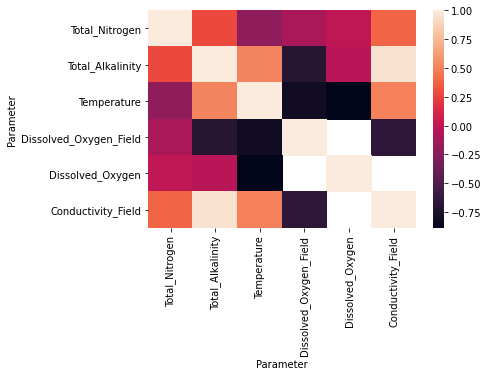

In [ ]:
import seaborn as sns

df_green_features=df_green_pivoted[['Total_Nitrogen', 'Total_Alkalinity', 'Temperature', 'Dissolved_Oxygen_Field', 'Dissolved_Oxygen', 'Conductivity_Field']]
sns.heatmap(df_green_features.corr())
df_green_features=df_green_features.reset_index(drop=True)
x = df_green_features.values #returns a numpy array
df_green_features
#x

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

data=df_green_features.fillna(0)

X = data.copy()
# Remove target
y = X.pop('Temperature')    # dropea col Temperatura y retorna la col
print(X)
print(y)

input_shape = [X.shape[1]]  #cantidad de columnas
print("Input shape: {}".format(input_shape))

Parameter  Total_Nitrogen  ...  Conductivity_Field
0                   0.440  ...                58.7
1                   0.490  ...                84.6
2                   0.301  ...                47.4
3                   0.500  ...                84.4
4                   0.000  ...                 0.0
...                   ...  ...                 ...
3648                0.319  ...                58.7
3649                0.479  ...                91.0
3650                0.292  ...                56.6
3651                0.332  ...                67.5
3652                0.462  ...                90.8

[3653 rows x 5 columns]
0        8.2
1        9.3
2        8.0
3        9.2
4        6.8
        ... 
3648    13.7
3649    13.2
3650    12.6
3651    12.6
3652    13.1
Name: Temperature, Length: 3653, dtype: float64
Input shape: [5]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(len(X_test))
print(len(X_train))


1206
2447


# Multilayer Perceptron with 0

In [ ]:
#Definimos la red usada para esta task
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import BatchNormalization

# define the keras model
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=input_shape),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1,'relu')
])

In [ ]:
#Definimos que tipo de "pérdida" y optimización usamos
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['accuracy']
)

Minimum validation loss: 2.2599873542785645


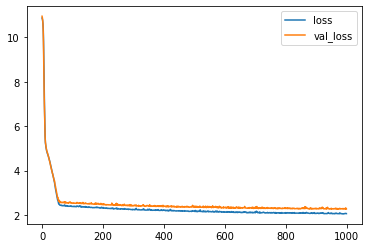

In [ ]:
import matplotlib.pyplot as plt

temp_model = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=1000,
    verbose=0,  # turn off training log
)

temp_df = pd.DataFrame(temp_model.history)
#print(temp_df)
temp_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(temp_df['val_loss'].min()))

In [ ]:
import random

predictions = model.predict(X_test)               # retorna un ndarray con las predicciones
print(len(predictions))

actual_values = y_test.reset_index(drop=True)     # indexes de 0..1205
actual_values

print(f'Predicted: {predictions[429]}, Actual: {actual_values[429]}')
for x in range(100):
  index = random.randint(0, 999)
  print(f'Predicted: {predictions[index]}, Actual: {actual_values[index]}')

1206
Predicted: [14.545411], Actual: 13.9
Predicted: [16.023966], Actual: 19.0
Predicted: [7.6648445], Actual: 9.6
Predicted: [7.15201], Actual: 8.42
Predicted: [5.441577], Actual: 7.3
Predicted: [17.44454], Actual: 14.4
Predicted: [17.027906], Actual: 17.9
Predicted: [14.48743], Actual: 14.0
Predicted: [14.690368], Actual: 15.5
Predicted: [6.823942], Actual: 8.9
Predicted: [10.275213], Actual: 8.85
Predicted: [9.024915], Actual: 5.5
Predicted: [16.226904], Actual: 14.5
Predicted: [5.920104], Actual: 5.8
Predicted: [6.0234413], Actual: 7.4
Predicted: [6.823942], Actual: 7.7
Predicted: [12.568053], Actual: 12.4
Predicted: [6.4297104], Actual: 7.2
Predicted: [9.024915], Actual: 10.4
Predicted: [14.980277], Actual: 15.2
Predicted: [19.47393], Actual: 19.2
Predicted: [6.114827], Actual: 5.8
Predicted: [7.877409], Actual: 4.4
Predicted: [14.835324], Actual: 15.6
Predicted: [6.900406], Actual: 6.1
Predicted: [12.1967125], Actual: 3.8
Predicted: [7.218178], Actual: 6.5
Predicted: [6.2386847],

# Multilayer Perceptron with less layers

In [ ]:
#Definimos la red usada para esta task
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import BatchNormalization

# define the keras model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1,'relu')
])

In [ ]:
#Definimos que tipo de "pérdida" y optimización usamos
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['accuracy']
)

Minimum validation loss: 11.236930847167969


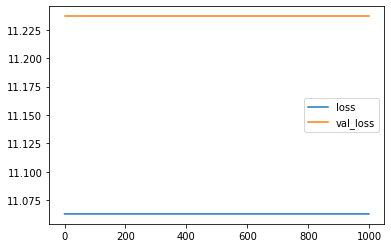

In [ ]:
import matplotlib.pyplot as plt

temp_model = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=1000,
    verbose=0,  # turn off training log
)

temp_df = pd.DataFrame(temp_model.history)
#print(temp_df)
temp_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(temp_df['val_loss'].min()))

In [ ]:
predictions = model.predict(X_test)               # retorna un ndarray con las predicciones

actual_values = y_test.reset_index(drop=True)     # indexes de 0..1205
actual_values

print(f'Predicted: {predictions[429]}, Actual: {actual_values[429]}')
for x in range(100):
  index = random.randint(0, 999)
  print(f'Predicted: {predictions[index]}, Actual: {actual_values[index]}')

Predicted: [0.], Actual: 13.9
Predicted: [0.], Actual: 8.0
Predicted: [0.], Actual: 4.9
Predicted: [0.], Actual: 12.0
Predicted: [0.], Actual: 7.3
Predicted: [0.], Actual: 17.6
Predicted: [0.], Actual: 7.5
Predicted: [0.], Actual: 21.5
Predicted: [0.], Actual: 14.0
Predicted: [0.], Actual: 2.5
Predicted: [0.], Actual: 8.3
Predicted: [0.], Actual: 13.0
Predicted: [0.], Actual: 11.12031476323117
Predicted: [0.], Actual: 11.4
Predicted: [0.], Actual: 5.7
Predicted: [0.], Actual: 16.0
Predicted: [0.], Actual: 10.3
Predicted: [0.], Actual: 17.6
Predicted: [0.], Actual: 6.0
Predicted: [0.], Actual: 4.6
Predicted: [0.], Actual: 13.3
Predicted: [0.], Actual: 8.1
Predicted: [0.], Actual: 8.3
Predicted: [0.], Actual: 13.1
Predicted: [0.], Actual: 7.81
Predicted: [0.], Actual: 7.1
Predicted: [0.], Actual: 11.0
Predicted: [0.], Actual: 14.7
Predicted: [0.], Actual: 11.12031476323117
Predicted: [0.], Actual: 4.0
Predicted: [0.], Actual: 11.4
Predicted: [0.], Actual: 17.8
Predicted: [0.], Actual: 12

# Perceptron

In [ ]:
#Definimos la red usada para esta task

# activation functions: relu, sigmoid, softmax, softplus, softsign, tanh, selu, exponential
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import BatchNormalization

# define the keras model
model = keras.Sequential([
    layers.Dense(1, activation='relu', input_shape=input_shape),
])

#Definimos que tipo de "pérdida" y optimización usamos
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['accuracy']
)

In [ ]:
import matplotlib.pyplot as plt

temp_model = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=1000,
    verbose=0,  # turn off training log
)

In [ ]:
import random

predictions = model.predict(X_test)               # retorna un ndarray con las predicciones
print(len(X_test))

actual_values = y_test.reset_index(drop=True)     # indexes de 0..1205
actual_values

print(f'Predicted: {predictions[429]}, Actual: {actual_values[429]}')
for x in range(100):
  index = random.randint(0, 999)
  print(f'Predicted: {predictions[index]}, Actual: {actual_values[index]}')

1206
Predicted: [10.39238], Actual: 13.9
Predicted: [10.556551], Actual: 12.9
Predicted: [6.3246245], Actual: 7.2
Predicted: [10.451891], Actual: 12.9
Predicted: [8.619056], Actual: 18.0
Predicted: [7.5259724], Actual: 8.17
Predicted: [10.474464], Actual: 17.0
Predicted: [11.049064], Actual: 3.7
Predicted: [16.556509], Actual: 9.8
Predicted: [15.55464], Actual: 14.9
Predicted: [10.659158], Actual: 11.1
Predicted: [11.262376], Actual: 10.9
Predicted: [8.866303], Actual: 5.7
Predicted: [10.556551], Actual: 17.2
Predicted: [9.788112], Actual: 13.7
Predicted: [12.231905], Actual: 14.0
Predicted: [10.761765], Actual: 9.4
Predicted: [9.895445], Actual: 9.5
Predicted: [10.515508], Actual: 11.1
Predicted: [10.259453], Actual: 13.0
Predicted: [10.966978], Actual: 8.9
Predicted: [8.473629], Actual: 6.13
Predicted: [10.1597], Actual: 11.5
Predicted: [8.545454], Actual: 5.8
Predicted: [10.638636], Actual: 16.6
Predicted: [11.008021], Actual: 3.4
Predicted: [10.802807], Actual: 8.3
Predicted: [11.2

# Multilayer Perceptron with mean

In [ ]:
data=df_green_features.apply(lambda x: x.fillna(x.mean(), axis=0))

X = data.copy()
# Remove target
y = X.pop('Temperature')    # dropea col Temperatura y retorna la col

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
#Definimos la red usada para esta task
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import BatchNormalization

# define the keras model
model = keras.Sequential([
    layers.Dense(8, activation='relu', input_shape=input_shape),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1,'relu')
])

In [ ]:
#Definimos que tipo de "pérdida" y optimización usamos
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['accuracy']
)

Minimum validation loss: 2.1689682006835938


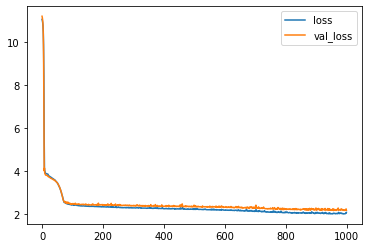

In [ ]:
import matplotlib.pyplot as plt

temp_model = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=256,
    epochs=1000,
    verbose=0,  # turn off training log
)

temp_df = pd.DataFrame(temp_model.history)
#print(temp_df)
temp_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(temp_df['val_loss'].min()))

In [ ]:
predictions = model.predict(X_test)               # retorna un ndarray con las predicciones

actual_values = y_test.reset_index(drop=True)     # indexes de 0..1205
actual_values

print(f'Predicted: {predictions[429]}, Actual: {actual_values[429]}')
for x in range(100):
  index = random.randint(0, 999)
  print(f'Predicted: {predictions[index]}, Actual: {actual_values[index]}')

Predicted: [14.692734], Actual: 13.9
Predicted: [11.249027], Actual: 8.0
Predicted: [6.7824225], Actual: 8.3
Predicted: [8.481279], Actual: 7.81
Predicted: [11.062907], Actual: 11.9
Predicted: [11.249027], Actual: 10.1
Predicted: [6.485108], Actual: 5.12
Predicted: [9.512972], Actual: 13.5
Predicted: [11.249027], Actual: 18.2
Predicted: [16.88503], Actual: 16.4
Predicted: [16.942783], Actual: 17.6
Predicted: [18.422903], Actual: 19.4
Predicted: [5.8688164], Actual: 7.9
Predicted: [7.262937], Actual: 5.1
Predicted: [6.455687], Actual: 11.12031476323117
Predicted: [10.673244], Actual: 10.4
Predicted: [7.9543233], Actual: 5.4
Predicted: [10.504583], Actual: 7.88
Predicted: [16.890045], Actual: 18.8
Predicted: [6.320955], Actual: 4.9
Predicted: [11.249027], Actual: 4.9
Predicted: [4.964542], Actual: 5.5
Predicted: [8.247295], Actual: 8.2
Predicted: [9.19443], Actual: 2.6
Predicted: [11.249027], Actual: 11.12031476323117
Predicted: [10.871544], Actual: 16.4
Predicted: [14.379374], Actual: 1

# Reusando Modelo

In [ ]:
df_issa_pivoted=df_issa.pivot(index=('Sample_ID','Collect_DateTime'),columns='Parameter', values='Value')
df_issa_pivoted

,Parameter,Ammonia Nitrogen,Conductivity,"Conductivity, Field",Dissolved Oxygen,"Dissolved Oxygen, Field",E. coli,Enterococcus,Fecal Coliform,Nitrite + Nitrate Nitrogen,Orthophosphate Phosphorus,Silica,Temperature,Total Alkalinity,Total Nitrogen,Total Phosphorus,Total Suspended Solids,Turbidity,pH,"pH, Field"
Sample_ID,Collect_DateTime,,,,,,,,,,,,,,,,,,,
5725,04/11/2017 12:40:00 PM,0.0151,NaN,94.3,NaN,11.70,NaN,NaN,5.0,0.6780,0.00848,15.9,8.6,34.8,0.861,0.0222,3.6,2.14,NaN,7.41
5752,04/11/2017 12:26:00 PM,0.0056,NaN,128.0,NaN,11.10,NaN,NaN,1.0,0.1180,0.00868,NaN,10.0,47.5,0.336,0.0279,2.0,1.70,NaN,7.36
5771,04/11/2017 12:12:00 PM,0.0050,NaN,92.6,NaN,11.60,NaN,NaN,7.0,0.7640,0.00725,NaN,8.8,32.9,0.938,0.0239,3.2,2.46,NaN,7.41
7415,01/04/1972 12:00:00 AM,0.0100,79.0,NaN,12.8,NaN,NaN,NaN,NaN,0.1400,NaN,NaN,4.2,24.0,NaN,NaN,26.0,2.60,6.3,6.30
7416,01/04/1972 12:00:00 AM,0.0100,65.0,NaN,12.0,NaN,NaN,NaN,NaN,0.1600,NaN,NaN,2.5,17.0,NaN,NaN,5.0,2.50,7.0,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193409,09/30/2020 12:51:00 PM,0.0186,NaN,206.0,NaN,8.88,NaN,NaN,79.0,0.0483,0.02460,NaN,14.5,76.8,0.316,0.0577,0.5,1.25,NaN,7.38
193424,09/30/2020 12:28:00 PM,0.0086,NaN,151.0,NaN,10.90,NaN,NaN,86.0,0.5300,0.01290,NaN,12.7,59.6,0.619,0.0277,0.9,1.07,NaN,7.53
193953,10/12/2020 01:29:00 PM,0.0070,NaN,114.0,NaN,10.60,NaN,NaN,170.0,0.7090,0.01150,NaN,12.4,42.7,0.889,0.0350,3.6,3.03,NaN,7.37


In [ ]:
#le sacamos los espacios a los nombres de columnas
df_issa_pivoted.columns = df_issa_pivoted.columns.str.replace(' ', '_')
df_issa_pivoted.columns = df_issa_pivoted.columns.str.replace('+', '_')
df_issa_pivoted.columns = df_issa_pivoted.columns.str.replace(',', '_')
df_issa_pivoted.columns = df_issa_pivoted.columns.str.replace('__', '_')
df_issa_pivoted

,Parameter,Ammonia_Nitrogen,Conductivity,Conductivity_Field,Dissolved_Oxygen,Dissolved_Oxygen_Field,E._coli,Enterococcus,Fecal_Coliform,Nitrite__Nitrate_Nitrogen,Orthophosphate_Phosphorus,Silica,Temperature,Total_Alkalinity,Total_Nitrogen,Total_Phosphorus,Total_Suspended_Solids,Turbidity,pH,pH_Field
Sample_ID,Collect_DateTime,,,,,,,,,,,,,,,,,,,
5725,04/11/2017 12:40:00 PM,0.0151,NaN,94.3,NaN,11.70,NaN,NaN,5.0,0.6780,0.00848,15.9,8.6,34.8,0.861,0.0222,3.6,2.14,NaN,7.41
5752,04/11/2017 12:26:00 PM,0.0056,NaN,128.0,NaN,11.10,NaN,NaN,1.0,0.1180,0.00868,NaN,10.0,47.5,0.336,0.0279,2.0,1.70,NaN,7.36
5771,04/11/2017 12:12:00 PM,0.0050,NaN,92.6,NaN,11.60,NaN,NaN,7.0,0.7640,0.00725,NaN,8.8,32.9,0.938,0.0239,3.2,2.46,NaN,7.41
7415,01/04/1972 12:00:00 AM,0.0100,79.0,NaN,12.8,NaN,NaN,NaN,NaN,0.1400,NaN,NaN,4.2,24.0,NaN,NaN,26.0,2.60,6.3,6.30
7416,01/04/1972 12:00:00 AM,0.0100,65.0,NaN,12.0,NaN,NaN,NaN,NaN,0.1600,NaN,NaN,2.5,17.0,NaN,NaN,5.0,2.50,7.0,7.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193409,09/30/2020 12:51:00 PM,0.0186,NaN,206.0,NaN,8.88,NaN,NaN,79.0,0.0483,0.02460,NaN,14.5,76.8,0.316,0.0577,0.5,1.25,NaN,7.38
193424,09/30/2020 12:28:00 PM,0.0086,NaN,151.0,NaN,10.90,NaN,NaN,86.0,0.5300,0.01290,NaN,12.7,59.6,0.619,0.0277,0.9,1.07,NaN,7.53
193953,10/12/2020 01:29:00 PM,0.0070,NaN,114.0,NaN,10.60,NaN,NaN,170.0,0.7090,0.01150,NaN,12.4,42.7,0.889,0.0350,3.6,3.03,NaN,7.37


In [ ]:
df_issa_features=df_issa_pivoted[['Total_Nitrogen', 'Total_Alkalinity', 'Temperature', 'Dissolved_Oxygen_Field', 'Dissolved_Oxygen', 'Conductivity_Field']]
df_issa_features=df_green_features.reset_index(drop=True)
df_issa_features=df_issa_features.fillna(0)
df_issa_features

Parameter,Total_Nitrogen,Total_Alkalinity,Temperature,Dissolved_Oxygen_Field,Dissolved_Oxygen,Conductivity_Field
0,0.440,20.3,8.2,11.30,0.0,58.7
1,0.490,25.8,9.3,10.60,0.0,84.6
2,0.301,16.4,8.0,12.00,0.0,47.4
3,0.500,25.7,9.2,10.60,0.0,84.4
4,0.000,0.0,6.8,0.00,0.0,0.0
...,...,...,...,...,...,...
3648,0.319,22.4,13.7,10.80,0.0,58.7
3649,0.479,32.6,13.2,9.53,0.0,91.0
3650,0.292,21.4,12.6,11.20,0.0,56.6
3651,0.332,24.9,12.6,9.93,0.0,67.5


In [ ]:
X_issa = df_issa_features.drop(columns='Temperature')
y_issa = df_issa_features.pop('Temperature')

In [ ]:
import random

predictions = model.predict(X_issa)               # retorna un ndarray con las predicciones

actual_values = y_issa.reset_index(drop=True)     # indexes de 0..1205
actual_values

#print(f'Predicted: {predictions[429]}, Actual: {actual_values[429]}')
for x in range(100):
  index = random.randint(0, 999)
  print(f'Predicted: {predictions[index]}, Actual: {actual_values[index]}')

Predicted: [11.224947], Actual: 14.5
Predicted: [10.941147], Actual: 9.2
Predicted: [9.456082], Actual: 8.2
Predicted: [17.311846], Actual: 18.3
Predicted: [11.820923], Actual: 11.9
Predicted: [5.848462], Actual: 4.8
Predicted: [9.021356], Actual: 16.0
Predicted: [16.960125], Actual: 17.1
Predicted: [10.353697], Actual: 13.7
Predicted: [12.927734], Actual: 10.5
Predicted: [9.021356], Actual: 12.6
Predicted: [9.021356], Actual: 4.8
Predicted: [15.787707], Actual: 16.6
Predicted: [9.021356], Actual: 6.2
Predicted: [7.6311474], Actual: 8.2
Predicted: [16.637712], Actual: 18.1
Predicted: [9.021356], Actual: 6.8
Predicted: [8.184841], Actual: 8.6
Predicted: [13.4953375], Actual: 12.3
Predicted: [9.021356], Actual: 7.0
Predicted: [9.021352], Actual: 6.5
Predicted: [16.901505], Actual: 17.0
Predicted: [9.021352], Actual: 6.0
Predicted: [9.021356], Actual: 5.4
Predicted: [9.021356], Actual: 15.0
Predicted: [5.158841], Actual: 5.5
Predicted: [9.021356], Actual: 13.5
Predicted: [9.021356], Actua

In [ ]:
df.loc[(df['Area']=='Green') | (df['Area']=='Issaquah')]

,Sample_ID,Collect_DateTime,Depth_(m),Site_Type,Area,Locator,Site,Parameter,Value,Units,SiteName,Latitude,Longitude,New_Georeferenced_Column
7583,20984,07/18/1995 01:05:00 PM,NaN,Streams and Rivers,Green,3106,Green River at Starfire Way,Turbidity,1.7000,NTU,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
7584,27263,02/15/2006 10:14:00 AM,NaN,Streams and Rivers,Green,3106,Green River at Starfire Way,"Dissolved Oxygen, Field",10.3000,mg/L,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
7585,9410,03/24/1980 12:00:00 AM,1.0,Streams and Rivers,Green,3106,Green River at Starfire Way,Total Suspended Solids,12.3000,mg/L,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
7586,11974,11/06/1984 12:00:00 AM,1.0,Streams and Rivers,Green,3106,Green River at Starfire Way,Temperature,7.9000,deg C,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
7587,12501,10/08/1985 12:00:00 AM,1.0,Streams and Rivers,Green,3106,Green River at Starfire Way,pH,7.1000,pH,Green River at Starfire Way,47.4678,-122.249,POINT (-122.2489722 47.46780556)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443429,35946,07/11/2017 12:32:00 PM,NaN,Streams and Rivers,Issaquah,0632,Issaquah North Fork at mouth,"Conductivity, Field",204.0000,umhos/cm,Issaquah North Fork at mouth,47.5502,-122.046,POINT (-122.046 47.5502)
443430,156820,07/17/2018 12:48:00 PM,NaN,Streams and Rivers,Issaquah,0632,Issaquah North Fork at mouth,Total Nitrogen,0.3790,mg/L,Issaquah North Fork at mouth,47.5502,-122.046,POINT (-122.046 47.5502)
443431,144353,11/14/2017 12:19:00 PM,NaN,Streams and Rivers,Issaquah,0632,Issaquah North Fork at mouth,"Conductivity, Field",121.0000,umhos/cm,Issaquah North Fork at mouth,47.5502,-122.046,POINT (-122.046 47.5502)
443432,183030,09/10/2019 09:59:00 AM,NaN,Streams and Rivers,Issaquah,0632,Issaquah North Fork at mouth,Nitrite + Nitrate Nitrogen,0.0889,mg/L,Issaquah North Fork at mouth,47.5502,-122.046,POINT (-122.046 47.5502)
